<a href="https://colab.research.google.com/github/AndriiGoz/traffic_signs_classification/blob/master/traffic_signs_classification_lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Traffic Signs with LeNet-5 CNN
The purpose of this project is to train an implementation of the LeNet-5 Convolutional Neural Network for the classification of traffic signs. The model will be used in an application, where the user can upload a photo of a traffic sign and get the prediction of its class.


### 1. Mount Google Drive
The dataset was taken from *The German Traffic Sign Recognition Benchmark (GTSRB): https://benchmark.ini.rub.de/gtsrb_dataset.html.* It consists of about 40.000 real colorful photos of german traffic signs. The images have a .ppm extension and their size varies from 15x15 to 250x250 pixels. We save the dataset on Google Drive and access it using *drive.mount* command.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### 2. Import libraries
Here we just import libraries we need in our Project: 
- some standard ones as NumPy, OS, and Matplotlib;
- cv2, a powerful library developed for solving computer vision tasks (https://opencv.org/);
- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for splitting the dataset into train and test subsets;
- some components from [tf.keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/models)...;
- and from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) for building the model.

In [23]:
import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

### 3. Read and pre-process image files
We start with reading images from the dataset. The images are distributed over 43 folders representing 43 classes. We loop through folders and through images, open them, resize to 32x32 pixels, convert from RGB to gray, and save them as np.arrays.

In [24]:
images = []
labels = []
classes = 43

current_path = '/content/gdrive/My Drive/GTSRB/Final_Training/Images/'

for i in range(classes):
    path = os.path.join(current_path, str(str(i).zfill(5)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1.0
            labels.append(label)
        except:
            pass

We divide images by 255 to get pixel values between 0.0 and 1.0. Finally, we have got a total amount of 39.209 images assigned to 43 classes.

In [25]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39209, 32, 32)
Labels shape: (39209, 43)


### 4. Split Dataset into train and test subsets
The dataset has to be split now into train and test subsets. For the test subset, we take out a standard 20% of the dataset.

In [26]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31367, 32, 32)
y_train shape: (31367, 43)
X_test shape: (7842, 32, 32)
y_test shape: (7842, 43)



Let's take a look at some samples from our dataset. We pick up 25 random images and plot them together with their labels.

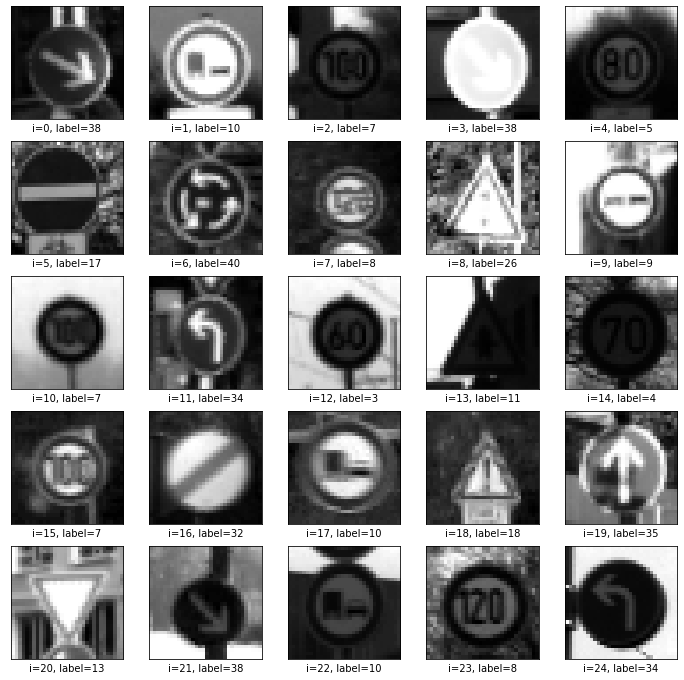

In [27]:
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='gray')
plt.show()

### 5. Build the model
For our classification task, we will use an implementation of LeNet-5 Convolutional Neural Network. LeNet-5 was designed by Yann LeCun and others in 1998 and was one of the earliest convolutional neural networks. Its architecture is extremely simple but very efficient.

There are three Convolutional Layers based on 5x5 filters and followed by average pooling with 2×2 patches. We use the ReLU function for activation as it leads to faster training. Then we add Dropout Layer with a factor of 0.2 to overcome overfitting. It means that 20% of the input will be randomly nullified to prevent strong dependencies between layers. We end up with Flattening and two Dense Layers. In the last Dense Layer, we have to assign the number of neurons equal to the number of classes, and the Softmax activation function to get probabilities between 0 and 1. The resulting number of weights in this network is 70,415.

In [28]:
# Building the model
model = Sequential([
    Rescaling(1, input_shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(units=120, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model architecture
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 32, 32, 1)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_13 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 1, 1, 120)        

### 6. Train the model

In [29]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
981/981 [==============================] - 23s 23ms/step - loss: 1.9154 - accuracy: 0.4598 - val_loss: 0.7200 - val_accuracy: 0.7932
Epoch 2/50
981/981 [==============================] - 22s 23ms/step - loss: 0.6807 - accuracy: 0.7951 - val_loss: 0.4133 - val_accuracy: 0.8827
Epoch 3/50
981/981 [==============================] - 22s 22ms/step - loss: 0.4622 - accuracy: 0.8607 - val_loss: 0.2995 - val_accuracy: 0.9104
Epoch 4/50
981/981 [==============================] - 21s 22ms/step - loss: 0.3555 - accuracy: 0.8924 - val_loss: 0.2199 - val_accuracy: 0.9449
Epoch 5/50
981/981 [==============================] - 21s 22ms/step - loss: 0.2844 - accuracy: 0.9143 - val_loss: 0.1839 - val_accuracy: 0.9485
Epoch 6/50
981/981 [==============================] - 22s 23ms/step - loss: 0.2390 - accuracy: 0.9267 - val_loss: 0.1505 - val_accuracy: 0.9614
Epoch 7/50
981/981 [==============================] - 23s 23ms/step - loss: 0.2055 - accuracy: 0.9367 - val_loss: 0.1292 - val_accuracy:

### 7. Evaluate training results
After 50 epochs we received an accuracy of about 99%, which is quite good. Thus we stop here.

In [30]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

246/246 - 2s - loss: 0.0598 - accuracy: 0.9892 - 2s/epoch - 9ms/step

Valifdation accuracy: 0.98916095495224

Validation loss: 0.05982920527458191



Let's create plots of loss and accuracy on the training and validation sets.

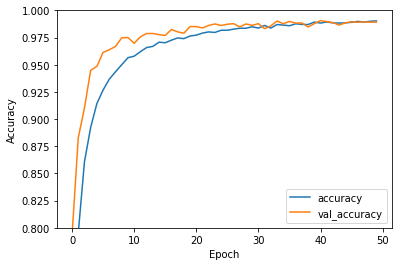

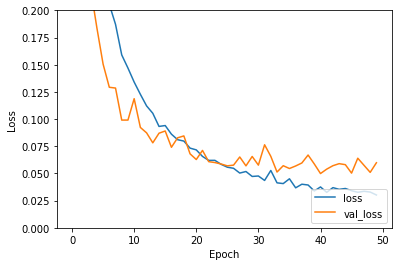

In [31]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='lower right')

As we see from the plots, train and validation accuracy go close, validation loss doesn't go up. So, the model looks fine, and we do not have much overfitting here.

### 8. Prediction for sampless
Let's take a look at some samples and find the wrong classified pictures. We label the images with *prediction* and *ground truth* classes. If prediction equals ground truth, we assign a green color to the label, otherwise we make it red.

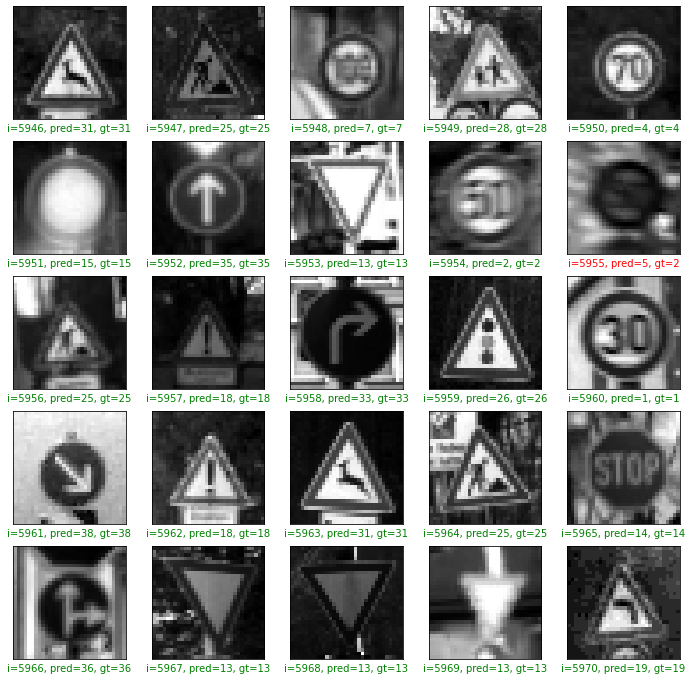

In [53]:
preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 7800)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()

For image number 5955 we can see that the "Speed limit (50km/h)" sign was misclassified as "Speed limit (80km/h)". Obviously, the text on the sign here is very hard to recognize.

### 9. Save the model
In the end, we save the model to a separate folder on Google Drive. It will be used for further predictions in the application for traffic signs recognition.

In [54]:
model.save('/content/gdrive/My Drive/keras_model/')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/keras_model/assets
